<style>
td {
  font-size: 50px
}
</style>


Escreva seu nome: <font color=red>Carlos Eduardo Dip</font>


Escreva seu login presente na folha de provas: <font color=red>prova119 </font>



# Avaliação Intermediária de Ciência dos dados

**2019 - 2o. semestre**

___
#### Leia atentamente as instruções da AI descritas na parte em papel e que devem ser seguidas rigorosamente aqui!

___


### As funções foram importadas do GitHub: [DataSci_Functions](https://github.com/CEDipEngineering/DataSci_Functions)

In [27]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import * ## Não julgue.
import os.path
import json
import re
import string
import functools
import operator
from random import shuffle
from numpy.polynomial.polynomial import polyfit

def prob_between(a, b, loc = 0, scale = 1, avg_occurences = 1, n = 1, p = 0.5,  kind = 'norm'):
    
    """
    .
    Função para calcular a probabilidade P(X=x), com b <= x <= a
    
    a = Um dos limites de integração, ou, um dos limites para a variável aleatória. 
    b = Um dos limites de integração, ou, um dos limites para a variável aleatória.
    loc = média; usado para distribuição normal e exponencial.
    scale = desvio padrão, usado para distribuição normal e exponencial.
    avg_occurences = Número médio de ocorrências por unidade de tempo, comumente, lambda.
    n = número de experimentos para as distribuições bernoulli e binomial.
    p = probabilidade de um evento de bernoulli ou binomial.
    kind = tipo de distribuição.
    .
    """
    
    mini, maxi = min(a,b), max(a,b)
    
    kinds = {
        'poisson': False,
        'binom': False,
        'bern': False,
        'expon': False
    }
    
    if kind in kinds:
        kinds[kind] = True
    else:
        return -1
        
    if kinds['poisson']:
        return poison.cdf(maxi, mu = avg_occurences) - poison.cdf(mini,  mu = avg_occurences)
    if kinds['binom']:
        return binom.cdf(maxi, n = n, p = p) - binom.cdf(mini,  n = n, p = p)
    if kinds['bern']:
        return 0
    if kinds['expon']:
        return expon.cdf(maxi, loc = loc, scale = scale) - expon.cdf(mini, loc = loc, scale = scale)
    return norm.cdf(maxi, loc=loc, scale=scale) - norm.cdf(mini, loc=loc, scale=scale)

###############################################################################################################################################

def prob_greater(a, loc = 0, scale = 1, avg_occurences = 1, n = 1, p = 0.5,  kind = 'norm'):
    
    """
    .
    
    ### -- IMPORTANTE: A FUNÇÃO SF DO STATS FAZ ISSO -- ###
    
    Função para calcular a probabilidade P(X=x), com x>=a.
        
    a = Um dos limites de integração, ou, um dos limites para a variável aleatória. 
    loc = média; usado para distribuição normal e exponencial.
    scale = desvio padrão, usado para distribuição normal e exponencial.
    avg_occurences = Número médio de ocorrências por unidade de tempo, comumente, lambda.
    n = número de experimentos para as distribuições bernoulli e binomial.
    p = probabilidade de um evento de bernoulli ou binomial.
    kind = tipo de distribuição.
    .
    """
    
    kinds = {
        'poisson': False,
        'binom': False,
        'bern': False,
        'expon': False
    }
    
    if kind in kinds:
        kinds[kind] = True
        
    if kinds['poisson']:
        return 1 - poison.cdf(a,  mu = avg_occurences)
    if kinds['binom']:
        return 1 - binom.cdf(a,  n = n, p = p)
    if kinds['bern']:
        return 1 - bern.cdf(a, p = p)
    if kinds['expon']:
        return 1 - expon.cdf(a, loc = loc, scale = scale)
    return 1 - norm.cdf(a, loc = loc, scale = scale)

###############################################################################################################################################

def find_quantiles(percents = np.arange(0.25, 1,0.25), loc = 0, scale = 1, avg_occurences = 1, n = 1, p = 0.5,  kind = 'norm'):
    
    """
    .
    Função para calcular os percentis.
        
    percents = Lista (iterável), de 0 a 1, que contém os percentis que deseja-se obter.    
    a = Um dos limites de integração, ou, um dos limites para a variável aleatória. 
    loc = média; usado para distribuição normal e exponencial.
    scale = desvio padrão, usado para distribuição normal e exponencial.
    avg_occurences = Número médio de ocorrências por unidade de tempo, comumente, lambda.
    n = número de experimentos para as distribuições bernoulli e binomial.
    p = probabilidade de um evento de bernoulli ou binomial.
    kind = tipo de distribuição.
    .
    """
    
    kinds = {
        'poisson': False,
        'binom': False,
        'bern': False,
        'expon': False
    }
    
    if kind in kinds:
        kinds[kind] = True
        
    if kinds['poisson']:
        return [poison.ppf(i,  mu = avg_occurences) for i in percents]
    if kinds['binom']:
        return [binom.ppf(i,  n = n, p = p) for i in percents]
    if kinds['bern']:
        return [bern.ppf(i, p = p) for i in percents]
    if kinds['expon']:
        return [expon.ppf(i, loc = loc, scale = scale) for i in percents]
    
    return [norm.ppf(i, loc = loc, scale = scale) for i in percents]

###############################################################################################################################################

def analise_dispersion(dataX, dataY, sort = True):
        
    """
    .
    Função que retorna um gráfico de dispersão dos dados, com linha de tendência, assim como a média e desvio padrão estimados.
    
    dataX e dataY = eixos do conjunto de dados a ser analisado. Podem ser listas ou séries do Pandas.
    kind = tipo de distribuição esperada. Pode ser estimada com probplots ou multi_probplot.
    .
    """
    
    y = dataY
    x = dataX 
    if sort:
        # Se quiser que ordene seus dados, para melhorar visualização, deixe True.
        y = sorted(dataY)
    b, m = polyfit(x, y, 1)
    f, ax1 = plt.subplots(figsize=(13, 10))     
    ax1.plot(x, b + m * x, '-', lw = 2.5, color="green", label = 'Tendência')
    ax1.scatter(x, y)
    ax1.legend()
    corr = pd.Series(dataX).corr(pd.Series(dataY))
    return ax1, corr #Plot, correlação de Pearson, respectivamente.

###############################################################################################################################################

def cleanup(text):
    punctuation = '[!-.:?;]' 
    pattern = re.compile(punctuation)
    #text = ' '.join(word for word in text.split() if not word.startswith('ESCREVA OQ VC QUER TIRAR')) 
    text_subbed = re.sub(pattern, ' ', text)
    return text_subbed  

###############################################################################################################################################

def evaluate_word_origin(text, base_data):
    
    """
    .
    Função que determina a probabilidade de um texto pertencer a um conjunto de palavras.
    
    text = Texto a ser avaliado, na forma de string. 
    base_data = Conjunto de palavras, do qual se quer saber a probabilidade do texto pertencer. Na forma de string ou série Pandas.
    .
    """
    
    if type(base_data) != type(pd.Series([0,1,2])):
        if type(base_data) == type('str'):
            data = pd.Series(base_data.split())           
    else:
        data = base_data
    data = data.value_counts(True)
    
    return data[cleanup(text).split()].prod()
    
###############################################################################################################################################

def seleciona_coluna_qualitativa(data, coluna, tipo):
    dados_selecionados = data[data[coluna] == tipo]
    return dados_selecionados

###############################################################################################################################################

def fit_data(data, kind = 'norm'):
    
    """
    .
    Função que retorna um histograma dos dados, com linha de destribuição teórica, assim como a média e desvio padrão estimados.
    
    data = Conjunto de dados a ser analisado. Pode ser uma lista ou série Pandas.
    kind = tipo de distribuição esperada. Pode ser estimada com probplots ou multi_probplot.
    .
    """
    
    f, ax1 = plt.subplots(figsize=(13, 10), dpi = 60)
    x = np.linspace(min(data), max(data), 500)
    data = pd.Series(data)
    if kind == 'expon':
        loc, scale = expon.fit(data)
        ax1.plot(x, expon.pdf(x, loc = loc, scale = scale))
        ax1.hist(data, density = True)
        return ax1, loc, scale
    else:
        loc, scale = norm.fit(data)
        ax1.plot(x, norm.pdf(x, loc = loc, scale = scale))
        ax1.hist(data, density = True)
        return ax1, loc, scale
    return -1,-1,[]

###############################################################################################################################################

def multi_probplot(data, loc = 0, scale = 1, avg_occurences = 1, n = 1, p = 0.5):
    
    """
    .
    Função que gera os 4 probplots mais comuns.
    
    data = Conjunto de dados a ser analisado. Pode ser uma lista ou série Pandas.
    loc = média; usado para distribuição normal e exponencial.
    scale = desvio padrão, usado para distribuição normal e exponencial.
    avg_occurences = Número médio de ocorrências por unidade de tempo, comumente, lambda.
    n = número de experimentos para as distribuições bernoulli e binomial.
    p = probabilidade de um evento de bernoulli ou binomial.
    kind = tipo de distribuição.
    .
    """
    
    kinds = {
        'poisson': "Poisson",
        'binom': "Binomial",
        'expon': "Exponencial",
        'norm': 'Normal' 
    }
        
    for k,v in kinds.items():
        if k == 'poisson':
            probplot(data, sparams = (avg_occurences), plot = plt, dist = k)
        if k == 'binom':
            probplot(data, sparams = (n, p), plot = plt, dist = k)
        if k == 'expon':
            probplot(data, sparams = (loc, scale), plot = plt, dist = k)
        if k == 'norm':
            probplot(data, sparams = (loc, scale), plot = plt, dist = k)
        plt.title(v)
        plt.show()
        

___

# Questão 1 - Análise Exploratória

**(3.75 pontos)**

___



<img src="spotify.png" width=33% alt="Fonte: https://commons.wikimedia.org/wiki/File:Spotify_Premium_stored-value_cards,_ALDI_Winschoten_(2019).jpg"> </img>

Esta questão usa várias técnicas empregadas no projeto 1.


Um competidor do Kaggle, George McIntire, que se diz ser apaixonado por músicas, ficou curioso para saber porquê ele gosta das músicas que ele gosta. 
Com isso, ele construiu um conjunto de dados de músicas de 2017 obtido via API do Spotify e rotulou cada música como *"Like"*, o que significa que ele gosta e *"Dont Like"* para músicas que não gosta. 

*Fonte: Textos extraídos e/ou adaptados de [https://www.kaggle.com/geomack/spotifyclassification]([https://www.kaggle.com/geomack/spotifyclassification]).*

Consulte o dicionario de dados no link [Dicionário de dados](./Q1_DicioSpotify.pdf) antes de resolver os itens a seguir.


In [28]:
dados_1 = pd.read_excel("Q1_Spotify_CD.xlsx")

In [29]:
dados_1.head(10)

,music_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_title,artist,liking
0,0,0.01020,0.833,204600,0.434,0.021900,0.1650,-8.795,0.4310,150.062,0.286,Mask Off,Future,Like
1,1,0.19900,0.743,326933,0.359,0.006110,0.1370,-10.401,0.0794,160.083,0.588,Redbone,Childish Gambino,Dont Like
2,2,0.03440,0.838,185707,0.412,0.000234,0.1590,-7.148,0.2890,75.044,0.173,Xanny Family,Future,Like
3,3,0.60400,0.494,199413,0.338,0.510000,0.0922,-15.236,0.0261,86.468,0.230,Master Of None,Beach House,Dont Like
4,4,0.18000,0.678,392893,0.561,0.512000,0.4390,-11.648,0.0694,174.004,0.904,Parallel Lines,Junior Boys,Dont Like
5,5,0.00479,0.804,251333,0.560,0.000000,0.1640,-6.682,0.1850,85.023,0.264,Sneakin’,Drake,Like
6,6,0.01450,0.739,241400,0.472,0.000007,0.2070,-11.204,0.1560,80.030,0.308,Childs Play,Drake,Dont Like
7,7,0.02020,0.266,349667,0.348,0.664000,0.1600,-11.609,0.0371,144.154,0.393,Gyöngyhajú lány,Omega,Dont Like
8,8,0.04810,0.603,202853,0.944,0.000000,0.3420,-3.626,0.3470,130.035,0.398,I've Seen Footage,Death Grips,Like
9,9,0.00208,0.836,226840,0.603,0.000000,0.5710,-7.792,0.2370,99.994,0.386,Digital Animal,Honey Claws,Like


In [30]:
dados_1.liking = dados_1.liking.astype('category')

In [31]:
dados_1.columns

Index(['music_id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'song_title', 'artist', 'liking'],
      dtype='object')


**A seção a seguir contém uma análise das variáveis  `energy` e  `liking`, por favor faça:**

**a)** Construa um histograma de densidade de frequências da variável `energy` separadamente para cada categoria de `liking`. (0.5 ponto)


**Resposta a partir daqui**

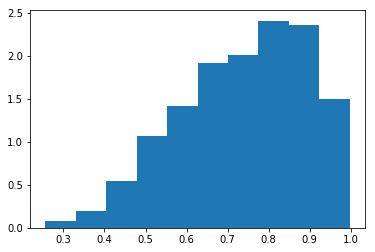

In [32]:
dados_Like = dados_1[dados_1.liking == 'Like']
x = dados_Like.energy
plt.hist(x, density = True);

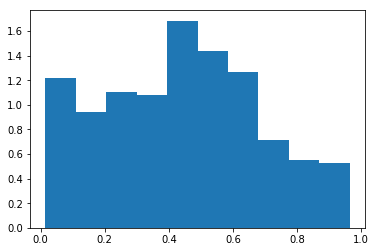

In [33]:
dados_NoLike = dados_1[dados_1.liking == 'Dont Like']
x2 = dados_NoLike.energy
plt.hist(x2, density = True);
# Não sei o que está acontecendo aqui, o histograma está muito estranho. Normalmente, um histograma de densidade deveria ter área 1. Este não.

**b)** Interprete os histogramas do item anterior em termos da preferência de George. Existe alguma tendência ou orientação em suas preferências? (0.5 ponto)

**Resposta a partir daqui**

Parece que ele tende a gostar de músicas com energia mais alta, já que a maior parte das músicas que ele gosta têm energia alta (maior parte da área do primeiro gráfico está à esquerda).

**c)** Observando o formato de cada histograma construído anteriormente e utilizando medidas de posição ou centralidade adequadamente, classifique como sendo simétrico, assimétrico a direita ou assimétrico a esquerda. Argumente claramente o motivo de sua classificação. 
Apresente as referidas medidas de posição (tendência central)  (0.75 ponto)

**Resposta a partir daqui**

Ambos os histogramas aparentam ser assimétricos à esquerda, já que a maioria dos dados (mediana) estão próximos da moda, (um pouco abaixo de 2 no primeiro gráfico, e entre 1 e 1.5 no segundo), porém ainda havendo muitos outliers para a esquerda (média destorcida).

**Análise das variáveis energy e loudness**

Neste item, considere as variáveis `energy` e `loudness` (utilize todas as faixas sem separar por `liking`).

A partir dos dados, faça:

**d)** Apresente um **gráfico** adequado que permita visualizar  a associação entre as variáveis `energy` e `loudness`. Discuta se há uma associação aparente a partir do gráfico (0.75 ponto)

**Resposta a partir daqui**

0.7621769711494922

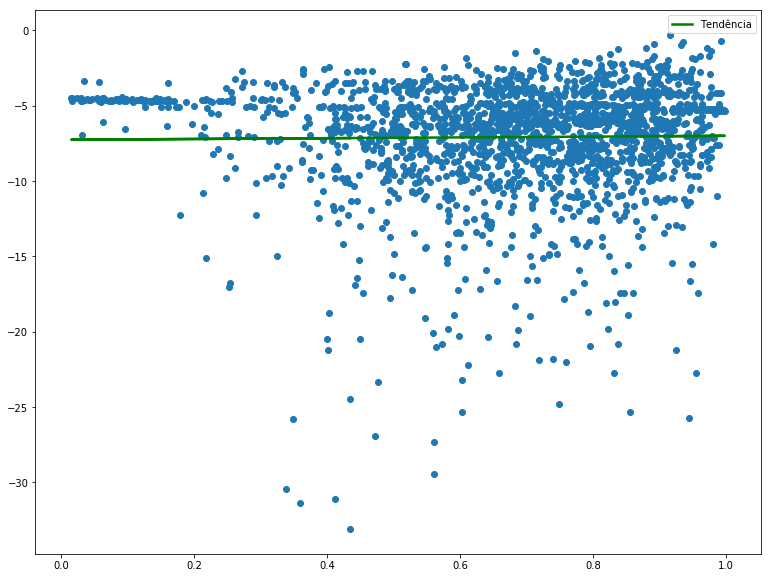

In [34]:
plot, corr = analise_dispersion(dados_1.energy, dados_1.loudness)
corr #Correlação de Pearson

Parece haver alguma correlação entre as variáveis de energy e loudness. Podemos percebr isso pelo agrupamento de pontos na região superior direita, que corresponde a músicas com energia alta (acima de 0.7), e volumes mais elevados (próximos de -5dB), o que sugere uma tendência das músicas da amostra.

**e)** Utilizando uma **medida-resumo** adequada, discuta o grau de associação dessas duas variáveis: `energy` e `loudness`. (0.75 ponto)

**Resposta a partir daqui**

Pela variável corr (explicitada acima do gráfico), percebemos que existe uma correlação alta entre as variáveis, 0.76 pontos na correlação de Pearson, indicando forte correlação positiva entre níveis crescentes de energia e volume.

___

# Questão 2 - modelos probabilísticos

**(3.75 pontos)**

___

![Fonte: https://commons.wikimedia.org/wiki/File:Structure_volcano_unlabeled.svg](volcano.png)

Kabum Prime é um planetinha no sistema solar de Zica-Centauri.
O ano em Kabum Prime tem 50 dias. Em Kabum Prime tem um vulcão que entra em erupção várias vezes por ano. Estamos no ano 10333 da nova era de Kabum Prime. Os cientistas kabunianos tabelaram as erupções do vulcão nos últimos 1000 anos kabunianos, e guardaram em um arquivo `"Q3_erupcoes.csv"`.

Nesta tabela são registrados o **ano** e o **dia** em que cada erupção vulcânica ocorreu

In [35]:
df = pd.read_csv('Q2_erupcoes.csv')
df.head()

,ano,dia
0,10234,4
1,10234,17
2,10234,19
3,10234,35
4,10234,44


Sabe-se que as erupções do vulcão acontecem independentemente: pode ser que tenhamos várias erupções por dia, pode ser que não tenhamos nenhuma, uma erupção não impacta a outra. Sabe-se também que o vulcão está permanentemente ativo, sempre com a mesma chance de irromper.

**a)** Apresente uma tabela  que conte quantas erupcões acontecem por ano. Use o pandas para obtê-la(0.5)

In [36]:
df.ano.value_counts().head(9)

11187    20
10528    20
10924    19
10677    19
11048    19
10828    19
10283    19
11049    18
10809    18
Name: ano, dtype: int64

**b)** Qual distribuição melhor modela o número de erupções anual do vulcão?  Para a distribuição apontada,  quais (ou qual) devem ser seus parâmetros? (0.5)

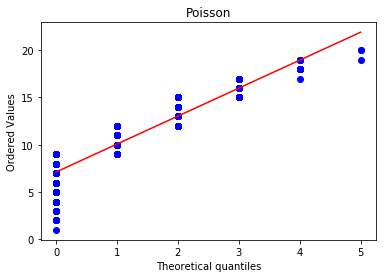

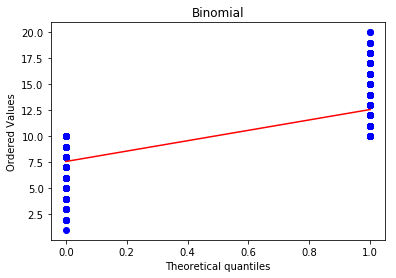

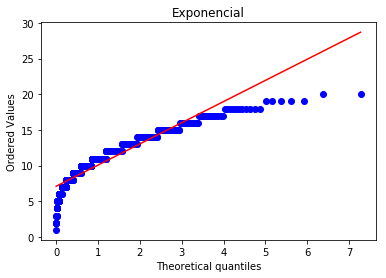

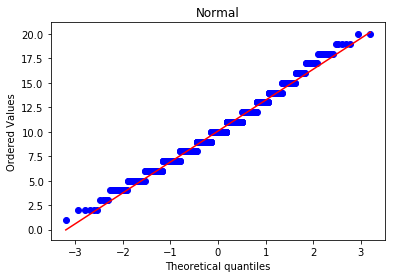

In [37]:
# Calcule os parâmetros da distribuição
multi_probplot(df.ano.value_counts())

Como visto nos probplots acima, parece que a distribuição normal é a que mais se adequa aos eventos vulcânicos de Zica-Centauri.
Assim, podemos fazer um ajuste de curva para visualizar como essa distribuição se compara com medidas teóricas.

A media e desvio padrão estimados são, respectivamente 10.074;3.173


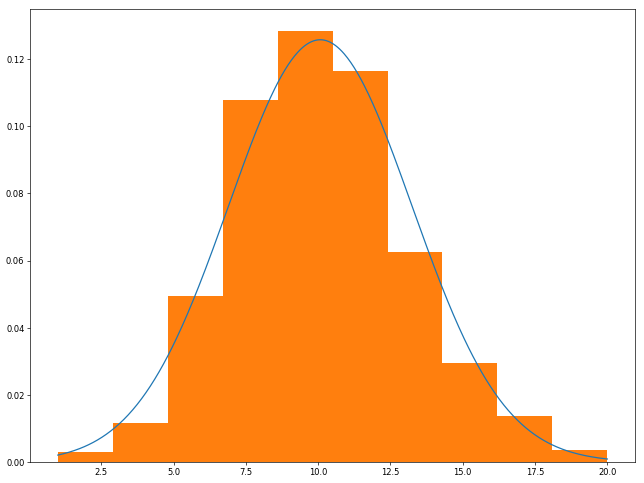

In [38]:
plot, media, sigma = fit_data(df.ano.value_counts())
sigma = round(sigma, 3)
print("A media e desvio padrão estimados são, respectivamente {0};{1}".format(media,sigma))

**R**: Assim, os parâmetros serão:
- Média: 10.074
- Desvio Padrão: 3.173

**c)** O grande sábio Vaydar Ru-Im (Nice) prevê que neste ano que se inicia teremos pelo menos 15 erupções e ele nunca erra.

Usando a distribuição obtida no item *(b)* e sabendo quo grande sábio nunca erra, responda: qual a probabilidade de que tenhamos número de erupções neste ano que exceda o recorde atual?
(1.00)

In [39]:
recorde = max(df.ano.value_counts())
norm.sf(recorde, loc = media, scale = sigma)

0.0008791935254909923

Se ele nunca erra, Vaydar Ru-Im, definitivamente. Contudo, a chance dele estar certo ainda é 0.087%.

**d)** Um bilionário do planeta decidiu doar toda sua fortuna  para o governo do planeta para ajuda humanitária se houver um número muito grande de erupções. Mas o bilionário é quem define o número de erupções. (0.75)

Como ele não é bobo, gostaria que a probabilidade de doar sua fortuna fosse de $1\%$ ou menos

Qual deve ser o número de erupções que ele deve escolher usando a distribuição escolhida **no item (b)**?


In [40]:
# Calcule o número de erupções
norm.ppf(0.99, loc = media, scale = sigma)

17.45550180433159

**R.** Basta o milionário sugerir que ele só doará de fato, caso hajam 18 (arredondando para cima), ou mais erupções. Ainda acredito que ele não deveria fazer isso, mas o dinheiro é dele.

**e)** O mês kabuniano tem 5 dias (ou seja, o ano tem 10 meses). Se acontece uma erupção no mês, cada kabuniano ganha 100 dinheiros de indenização do governo. Se acontecem 2 erupções, cada kabuniano ganha 150 dinheiros de indenização. Por fim, se acontecem 3 ou mais erupções o governo paga 200 dinheiros de indenização a cada kabuniano. Qual o valor esperado de indenizações por kabuniano em um mês? Qual o desvio-padrão? (1.00 ponto)

Como as erupções anuais seguem uma distribuição normal, podemos presumir que as mensais também. Assim, podemos presumir que a média e o desvio padrão são diretamente procporcionais ao intervalo de tempo analisados. Para transformar a análise feita anualmente em mensal, basta dividir tanto a média, quanto o desvio padrão por 10 (10 meses no ano).

In [41]:
media_mes = media/10
sigma_mes = sigma/10

Agora que temos os novos parâmetros da distribuição, o cálculo do valor esperado é simples:

In [42]:
valor = 0
valor += norm.pdf(1, loc = media_mes, scale = sigma_mes)*100
valor += norm.pdf(2, loc = media_mes, scale = sigma_mes)*150
valor += norm.sf(3, loc = media_mes, scale = sigma_mes)*200  #O mesmo que 1 - cdf().
valor

127.11033041063688

Assim, o valor esperado é 127.11 dinheiros, com novo desvio padrão de 0.317.

___

# Questão 3 - análise de texto

**(2.5 pontos)**

___

![Fonte: https://commons.wikimedia.org/wiki/File:CocaColaBottle_background_free.png](coca_cola.png)

Esta questão é baseada no Projeto 2

Você foi contratado pela empresa *The Coca Cola Company* para fazer monitoramento de redes sociais. Sua empresa fez um *bot* que continuamente busca por novas postagens no Twitter e as classifica.

A empresa está interessada em saber quais mensagens estão felizes com a marca versus o total que estão neutros ou insatisfeitos.

Sua base de treinamento está no arquivo `coca_cola.xlsx`.  

As mensagens felizes têm a coluna **Categoria** com valor `FELIZ` e as mensagens que não são felizes têm como **Categoria** o valor `NAO_FELIZ`.

Note que a coluna Texto já passou pelas seguintes etapas:
* Conversão para letras minúsculas
* Limpeza de pontuação

In [43]:
tweets = pd.read_excel("Q3_coca_cola.xlsx")

In [44]:
tweets.head()

,Texto,Categoria
0,acho que comer hamburguer de soja e se entupir...,NAO_FELIZ
1,gosto mais de vaca preta coca cola com sorvet...,FELIZ
2,me prometo uma coca cola gelada para o fim do...,FELIZ
3,essa coca cola gelada fez meu dia,FELIZ
4,prometo parar com doce refrigerante coca cola ...,NAO_FELIZ


Pede-se:

**a)** Junte todas as mensagens da cada categoria em uma *string* única
(0.5 ponto)

In [45]:
sad = tweets[tweets.Categoria == "NAO_FELIZ"]
hpy = tweets[tweets.Categoria == "FELIZ"]
string_sad = ' '
string_hpy = ' '

for frase in sad.Texto:     # Deselegante, mas funciona.
    string_sad += frase + ' '
for frase in hpy.Texto:
    string_hpy += frase + ' '


**b)** Apresente as tabelas que são equivalentes a $P(palavra|FELIZ)$ e $P(palavra|NAO\_FELIZ)$, e que contém todas as palavras presentes nas respectivas categorias.

Você deve guardá-las em variáveis e exibi-las de forma semelhante ao que foi feito com o comando `tweets.head()` acima. (0.5 ponto)

In [46]:
freq_hpy = pd.Series(string_hpy.split()).value_counts(True)
freq_sad = pd.Series(string_sad.split()).value_counts(True)
freq_sad.head(5)

coca    0.087302
cola    0.079365
de      0.039683
que     0.031746
a       0.031746
dtype: float64

In [47]:
freq_hpy.head(5)

coca    0.081871
cola    0.076023
de      0.052632
com     0.035088
a       0.029240
dtype: float64

**R.:**

$P(palavra|FELIZ)$

In [48]:
# insira aqui os comandos para obter
palavra = 'coca'
freq_hpy[palavra]

0.08187134502923976

$P(palavra|NAO\_FELIZ)$

In [49]:
# insira aqui os comandos para palavra não feliz. Crie mais células se precisar
freq_sad[palavra]

0.0873015873015873

**c)** Considerando que: 
* Não deve ser feito nenhum tratamento para o caso de palavras inéditas
* Não devem ser usadas bibliotecas de *machine learning* ou estatística
* Atenha-se ao `pandas` e `numpy`



Por favor faça:

Classifique usando um classificador *Naive Bayes* se a frase `"prometo que vai ser a última coca cola do dia"` é uma frase que pertence à categoria `FELIZ` ou `NAO_FELIZ`

Deixe claro (pode ser em comentários) o significado de seus cálculos e a qual conclusão chegou. Principalmente deixei claro *em qual número* baseou a conclusão 

Atente que vai ser necessário calcular os valores de $P(FELIZ)$ e $P(NAO\_FELIZ)$


Valor: (1.5 ponto)


In [50]:
frase = "prometo que vai ser a última coca cola do dia" # frase a classificar

In [51]:
P_Feliz = len(freq_hpy)/(len(freq_hpy)+len(freq_sad)) # Aqui, fiz o número de ocorrências de palavras felizes, dividido pelo tamanho do vocabluário.
P_Sad = len(freq_sad)/(len(freq_hpy)+len(freq_sad)) # Aqui, o contrário, dividindo o número de palavras triste pelo mesmo vocabulário.
P_Feliz, P_Sad # Mostrando os resultados.

(0.5478723404255319, 0.4521276595744681)

In [52]:
#Cálculo da probabilidade. Multiplica as frequências relativas, e depois multiplica pela probabilidade de pertencer aquele conjunto.
P_frase_hpy = freq_hpy[frase.split()].prod()*P_Feliz
P_frase_sad = freq_sad[frase.split()].prod()*P_Sad 
P_frase_hpy, P_frase_sad # Mostrando os resultados.

(8.395801548348335e-19, 1.5779683522758007e-18)

Podemos perceber, então, que a probabilidade da frase "prometo que vai ser a última coca cola do dia" ser feliz é muito menor do que a probabilidade de ela ser triste (12 ordens de grandeza menor). Assim, podemos concluir que a a frase, muito provavelmente, veio de alguém NAO_FELIZ.